# imports

In [50]:
import pandas as pd
import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt; plt.rcParams['font.family'] = 'Malgun Gothic'
# import seaborn as sns; sns.set_theme(font='Malgun Gothic')

# from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


pd.set_option('display.max_rows', 100, 'display.max_columns', 100, 'max_colwidth', None)
import warnings; warnings.filterwarnings(action='ignore')

# 숫자 잘린거 다 보여주기
pd.options.display.float_format = '{:.5f}'.format

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300

In [51]:
import statsmodels
statsmodels.__version__ # 0.12.2

'0.12.2'

# read

In [52]:
df = pd.read_csv('./dax.csv')

# ARIMA

In [53]:
df['Change']    = df['Close'].pct_change()
df['STDEV']     = df['Close'].rolling(window=20).std(ddof=0)
df['STDEV_log'] = np.log(df['Close'].rolling(window=20).std(ddof=0))
df['HV']        = df['Change'].rolling(window=20, center=False).std() * (252 ** 0.5)

In [54]:
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,Change,STDEV_log,STDEV
4784,2021-11-08,16068.73047,16016.20020,16040.84961,16046.51953,48903600.00000,16046.51953,-0.00049,5.52372,0.08562
4785,2021-11-09,16104.12988,16022.63965,16026.74023,16040.46973,61428000.00000,16040.46973,-0.00038,5.45327,0.08335
4786,2021-11-10,16076.55957,15985.90039,16053.00000,16067.83008,62124400.00000,16067.83008,0.00171,5.39759,0.08215
4787,2021-11-11,16114.54980,16032.50000,16067.33984,16083.11035,56626200.00000,16083.11035,0.00095,5.40273,0.07044
4788,2021-11-12,16122.75977,16065.05957,16100.08008,16094.07031,60302900.00000,16094.07031,0.00068,5.42669,0.06676


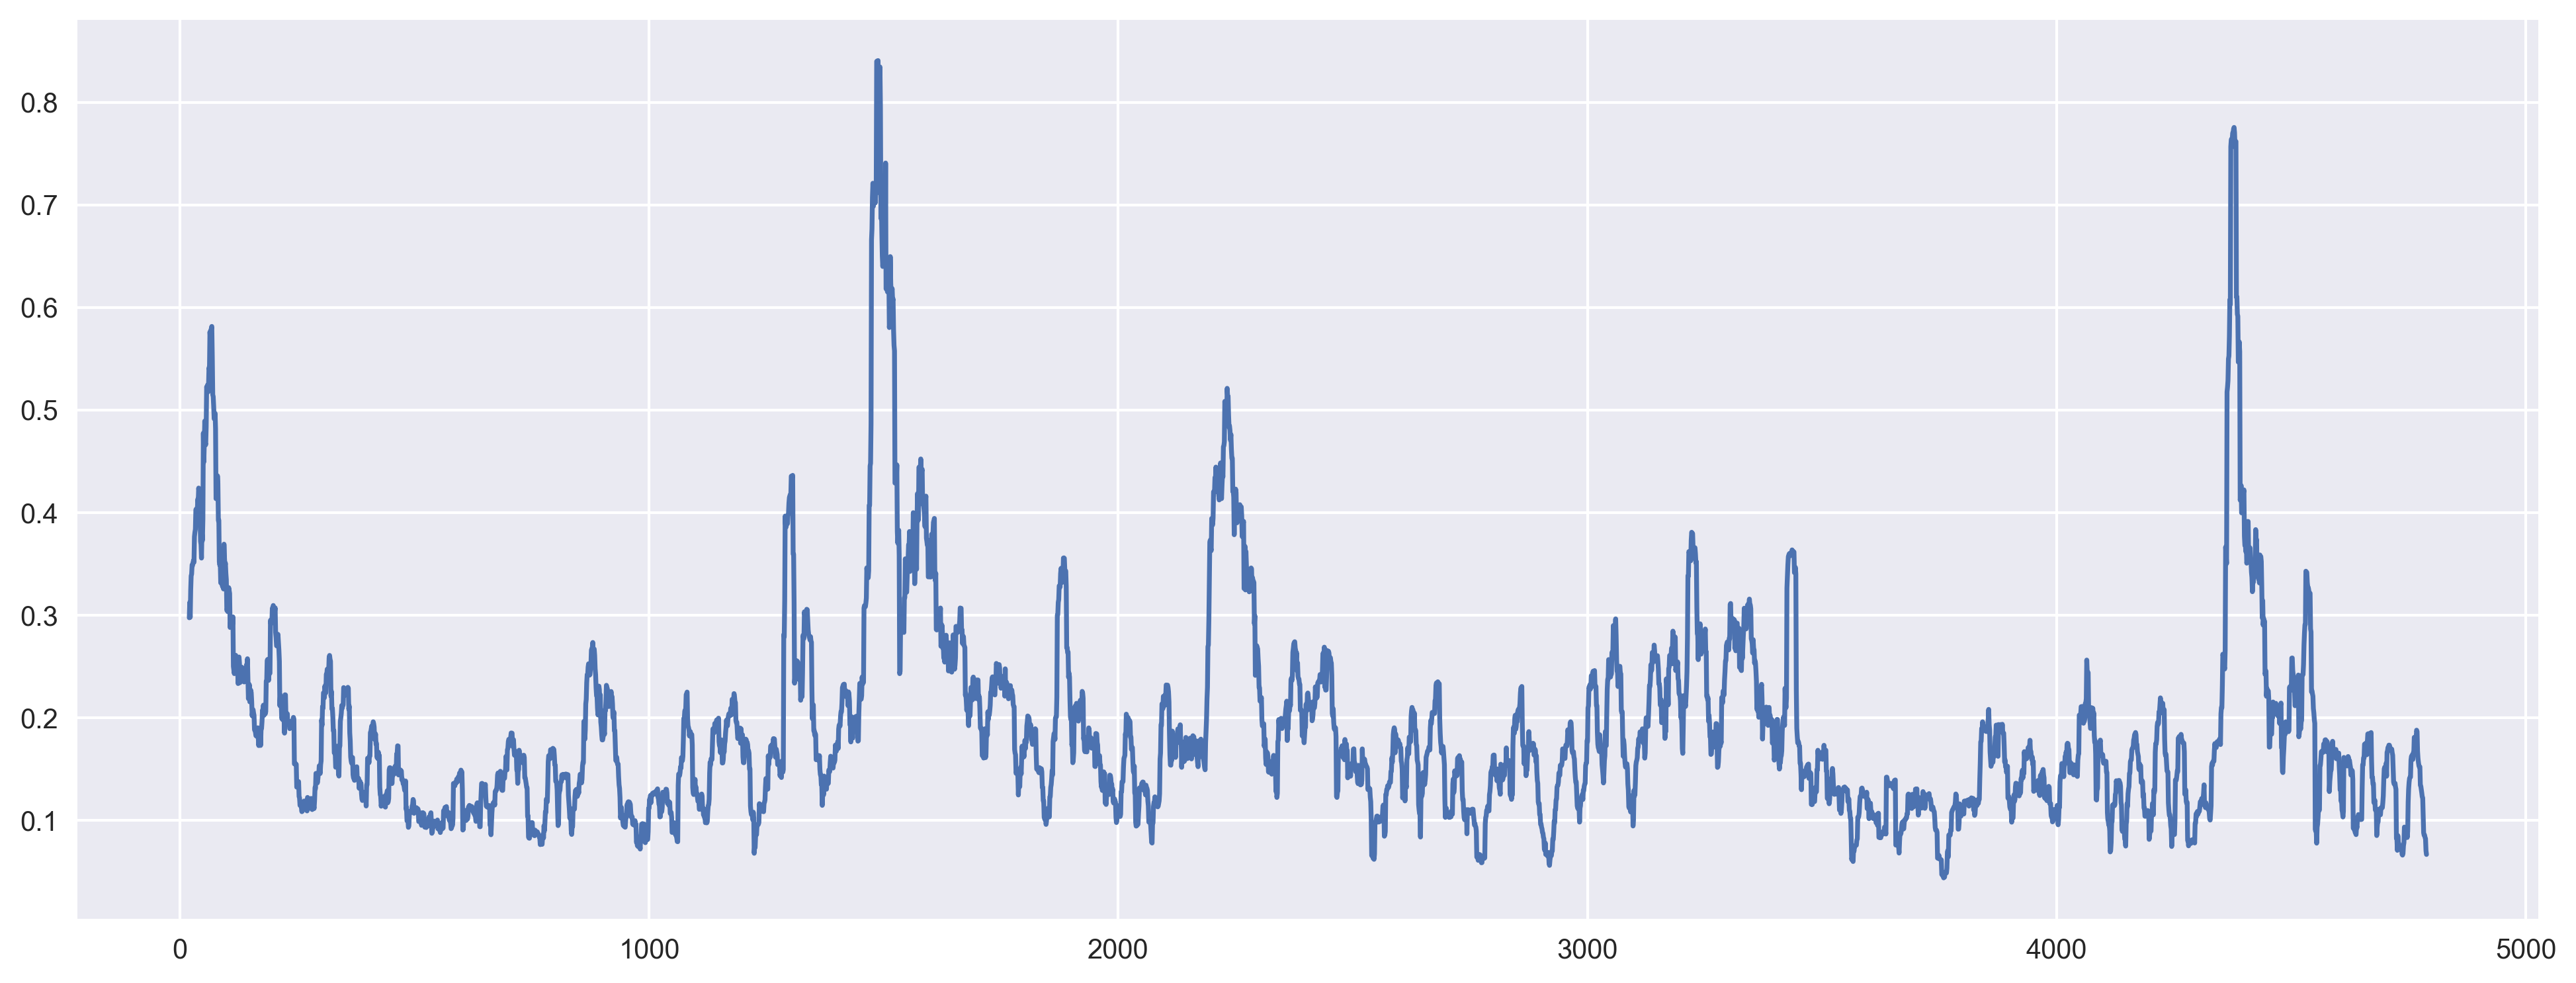

In [55]:
plt.figure(figsize=(16,6))
df['STDEV'].plot() # STDEV_log, HV
plt.show()

In [56]:
# nan 값 삭제
df = df.dropna()

In [57]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Change,STDEV_log,STDEV
20,2003-01-30,2742.91992,2665.52002,2711.84009,2693.78003,115937300.00000,2693.78003,-0.00473,5.10828,0.29749
21,2003-01-31,2753.26001,2622.40991,2687.71997,2747.83008,106047400.00000,2747.83008,0.02006,5.10334,0.31249
22,2003-02-03,2802.92993,2735.58008,2750.39990,2751.98999,73695500.00000,2751.98999,0.00151,5.05567,0.29795
23,2003-02-04,2750.04004,2618.13989,2750.04004,2632.97998,93671300.00000,2632.97998,-0.04325,5.05454,0.32438
24,2003-02-05,2738.11011,2584.87988,2626.85010,2725.87988,104109600.00000,2725.87988,0.03528,5.05105,0.33823


In [58]:
close_df = df[['Date','STDEV']]
# close_df = df[['Date','STDEV_log']]
# close_df = df[['Date','HV']]

close_df = close_df.sort_values('Date')
close_df = close_df.set_index('Date')

In [59]:
train_df = close_df.loc['2003-09-29':'2020-09-28']    # 2003-9-29 ~ 2020-9-28
test_df = close_df.loc['2020-09-29':'2021-09-28']  # 2020-9-29 ~ 2021-9-28

In [60]:
train_df.tail()

,STDEV
Date,
2020-09-22,0.23041
2020-09-23,0.22739
2020-09-24,0.22663
2020-09-25,0.22872
2020-09-28,0.25816


In [61]:
test_df.tail()

,STDEV
Date,
2021-09-22,0.13718
2021-09-23,0.14101
2021-09-24,0.14207
2021-09-27,0.14222
2021-09-28,0.15880


# Auto Arima

In [62]:
model_arima= auto_arima(train_df, trace=True, error_action='ignore', start_p=1, start_q=1, max_p=4, max_q=4)
model_arima.fit(train_df)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-24782.135, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-24786.135, Time=0.45 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-24784.814, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-24784.588, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-24788.134, Time=0.18 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.884 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [63]:
tmp_dict = model_arima.to_dict()
tmp_dict['order']

(0, 1, 0)

In [64]:
adfsdfsdf

NameError: name 'adfsdfsdf' is not defined

# ARIMA

In [65]:
model = ARIMA(train_df, order=(0,1,0))

arima_res = model.fit(trend='c', full_output=True, disp=1)
print(arima_res.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.STDEV   No. Observations:                 4312
Model:                 ARIMA(0, 1, 0)   Log Likelihood               12395.067
Method:                           css   S.D. of innovations              0.014
Date:                Mon, 15 Nov 2021   AIC                         -24786.135
Time:                        20:19:49   BIC                         -24773.396
Sample:                             1   HQIC                        -24781.636
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.033e-06      0.000      0.024      0.981      -0.000       0.000


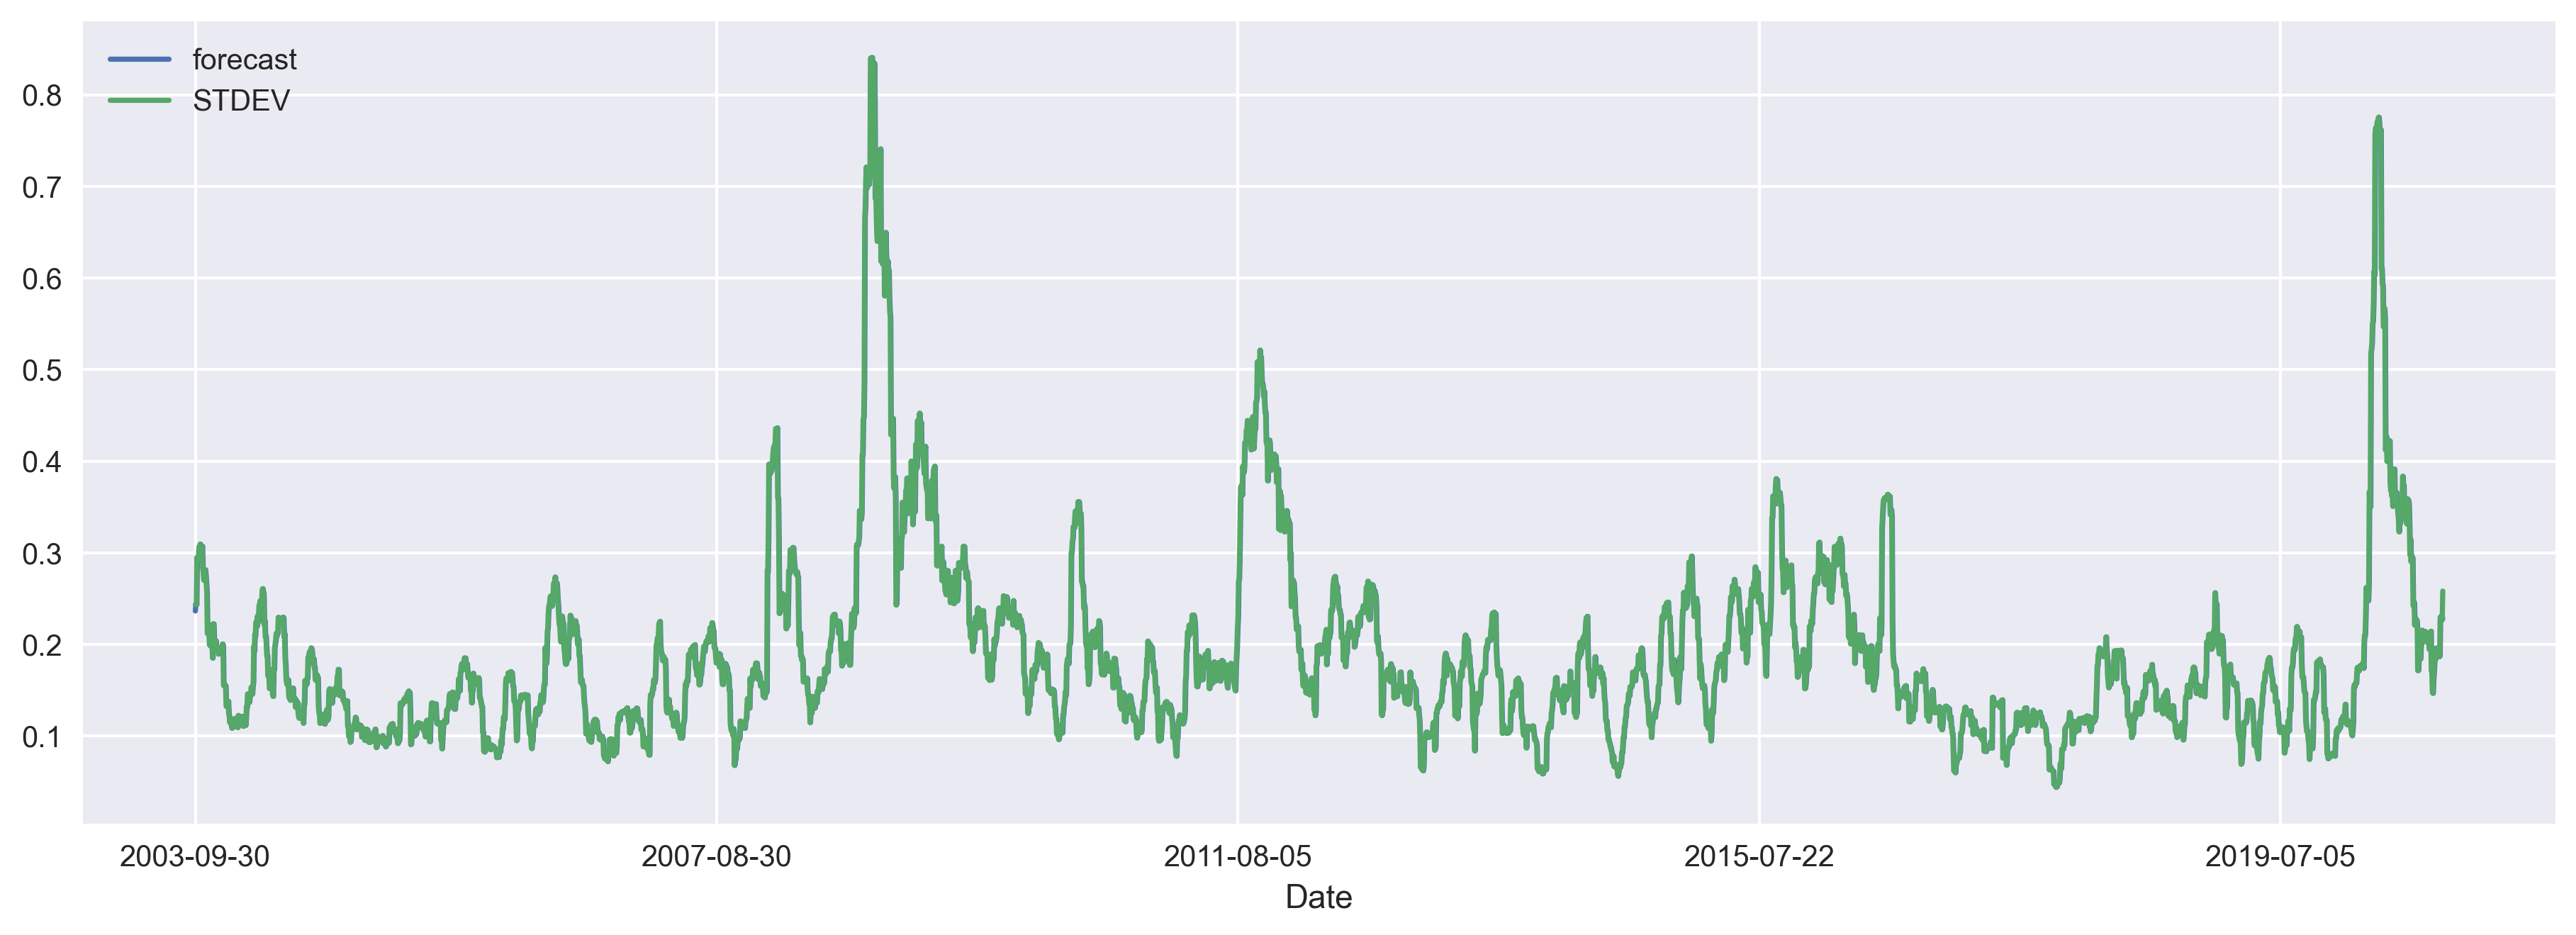

In [66]:
pig, ax = plt.subplots(figsize=(15,5))
arima_res.plot_predict(ax=ax)
plt.show()

# 1년치(2020-9-29 ~ 2021-9-28) 맞추기

In [67]:
forcast_result = arima_res.forecast(steps=254) # 245: 245일 맞춰봐 
# 예측값, stderr,   upper bound~lower bound
forcast_result = forcast_result[0]
print(forcast_result)

[0.25816553 0.25817057 0.2581756  0.25818063 0.25818567 0.2581907
 0.25819573 0.25820077 0.2582058  0.25821083 0.25821586 0.2582209
 0.25822593 0.25823096 0.258236   0.25824103 0.25824606 0.2582511
 0.25825613 0.25826116 0.25826619 0.25827123 0.25827626 0.25828129
 0.25828633 0.25829136 0.25829639 0.25830143 0.25830646 0.25831149
 0.25831652 0.25832156 0.25832659 0.25833162 0.25833666 0.25834169
 0.25834672 0.25835176 0.25835679 0.25836182 0.25836685 0.25837189
 0.25837692 0.25838195 0.25838699 0.25839202 0.25839705 0.25840208
 0.25840712 0.25841215 0.25841718 0.25842222 0.25842725 0.25843228
 0.25843732 0.25844235 0.25844738 0.25845241 0.25845745 0.25846248
 0.25846751 0.25847255 0.25847758 0.25848261 0.25848765 0.25849268
 0.25849771 0.25850274 0.25850778 0.25851281 0.25851784 0.25852288
 0.25852791 0.25853294 0.25853798 0.25854301 0.25854804 0.25855307
 0.25855811 0.25856314 0.25856817 0.25857321 0.25857824 0.25858327
 0.25858831 0.25859334 0.25859837 0.2586034  0.25860844 0.2586134

In [68]:
len(forcast_result)

254

In [69]:
real = np.array(test_df['STDEV'])
real

array([0.25825746, 0.2461296 , 0.24185654, 0.23521696, 0.22674514,
       0.22536366, 0.21169778, 0.21451761, 0.21456276, 0.21606086,
       0.21822056, 0.21789347, 0.23406865, 0.24162469, 0.18142484,
       0.1847648 , 0.1914531 , 0.19123956, 0.18904573, 0.19600754,
       0.19741318, 0.2406351 , 0.24221139, 0.24219263, 0.2518679 ,
       0.27100532, 0.28228626, 0.29056351, 0.29101168, 0.342847  ,
       0.3415266 , 0.34172216, 0.33190708, 0.32741868, 0.32712553,
       0.32488311, 0.31960455, 0.32195369, 0.32127623, 0.28656751,
       0.28368301, 0.2252804 , 0.22640791, 0.22338425, 0.22105656,
       0.20892778, 0.204841  , 0.19796961, 0.19460054, 0.09112585,
       0.08959906, 0.08995406, 0.07776307, 0.09325802, 0.09638609,
       0.10291203, 0.11399157, 0.10928252, 0.1104163 , 0.15356195,
       0.1539487 , 0.1597587 , 0.1669305 , 0.16737653, 0.16728323,
       0.16616571, 0.16634661, 0.17443916, 0.17474769, 0.17423266,
       0.17839264, 0.17857001, 0.17743805, 0.16696759, 0.17702

In [70]:
len(real)

254

# RMSE 확인

In [71]:
from sklearn.metrics import mean_squared_error

mean_squared_error(real, forcast_result, squared=False)

0.11831585846423776